# Phone Segmentation Analysis

Copyright (c) 2021 Herman Kamper, MIT License

## Preliminaries

In [33]:
%matplotlib inline
from pathlib import Path
from scipy.stats import gamma
import numpy as np
import pylab as plt
import sys

sys.path.append("..")

from utils import eval_segmentation

## Data

In [34]:
# Data set
dataset = "buckeye"

# Directories
phoneref_dir = Path("../data/")/dataset/"phone_intervals"

In [35]:
# Read word reference
print("Reading: {}".format(phoneref_dir))
phoneref_interval_dict = eval_segmentation.get_intervals_from_dir(phoneref_dir)

Reading: ../data/buckeye/phone_intervals


100%|██████████| 62481/62481 [00:02<00:00, 28292.92it/s]


No. phone types: 70
P(eos): 0.0983
Mean training phone length: 7.8728
Min training phone length:  0
Max training phone length:  111
Mean: 7.872796702727266
Gamma parameters: 2.2955041539519847 0 3.4296590965314984


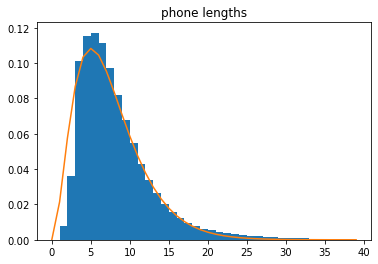

In [59]:
# Phone length statistics
phone_lengths = []
n_phones = []
phone_types = set()
for utt_key in phoneref_interval_dict:
    intervals = phoneref_interval_dict[utt_key]
    n_phones.append(len(intervals))
    for start, end, label in intervals:
        phone_lengths.append(end - start)
        phone_types.add(label)
print("No. phone types:", len(phone_types))
print(f"P(eos): {len(phoneref_interval_dict)/sum(n_phones):.4f}")
print("Mean training phone length: {:.4f}".format(np.mean(phone_lengths)))
print("Min training phone length:  {:d}".format(np.min(phone_lengths)))
print("Max training phone length:  {:d}".format(np.max(phone_lengths)))

# Histogram
plt.figure()
n, bins, patches = plt.hist(phone_lengths, bins=range(40), density=True)
plt.title("phone lengths")

# Gamma
mean = np.mean(phone_lengths)
var  = np.var(phone_lengths)
alpha = (mean**2)/var
beta  = alpha / mean
shape = alpha
loc = 0
scale = 1/beta
print("Mean:", mean)
print("Gamma parameters:", shape, loc, scale)
shape, loc, scale = (3, 0, 2.5)
plt.plot(bins, gamma.pdf(bins, shape, loc, scale))

# plt.show();